#### Instala os módulos necessários

In [ ]:
%pip install duckdb
%pip install keras
%pip install nbformat
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install pydot
%pip install scikit-learn
%pip install seaborn
%pip install tensorflow
%pip install warnings

#### Importa os módulos necessários

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import duckdb as ddb
import nbformat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from Custom import Custom_LSTM as CL

#### Ignora warnings que serão gerados

In [3]:
warnings.filterwarnings("ignore")

#### Análise exploratória, feature engineering, treinamento e avaliação do modelo

In [4]:
raw_bbas3 = pd.read_csv("_datasets/bbas3/treino.csv")
raw_bbas3.tail(5)

,Unnamed: 0,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
4730,4731,2019-03-19,39.001053,38.947137,1,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,38.570271,39.212849
4731,4732,2019-03-20,38.126942,38.865118,-1,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,38.570271
4732,4733,2019-03-21,37.326935,38.711299,-1,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073
4733,4734,2019-03-22,35.297241,38.369894,-1,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908
4734,4735,2019-03-25,35.549099,38.087814,-1,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718


Perceba que, ao importar o conjunto de dados, podemos realizar algumas alterações para facilitar a análise e manipulação das informações.

- Remoção de variáveis

    - "Unnamed: 0" : o registro representa um índice.
    - "Date" : o registro representa a data de coleta do dado.
    - "Smoothed_Close" : o registro representa o valor suavizado do fechamento do ativo - citado como "apenas uma curiosidade".

- Ordenação das variáveis

    - Para facilitar a interpretação, iremos ordenar o conjunto de dados pelas variáveis independentes seguidas da variável dependente.

In [5]:
spec_bbas3 = raw_bbas3.drop(columns="Smoothed_Close")
spec_bbas3 = spec_bbas3[["Close", "Past_1_Days_Close", "Past_2_Days_Close", "Past_3_Days_Close", "Past_4_Days_Close", "Past_5_Days_Close", "Past_6_Days_Close", "Past_7_Days_Close", "Past_8_Days_Close", "Past_9_Days_Close", "Past_10_Days_Close", "Past_11_Days_Close", "Past_12_Days_Close", "Past_13_Days_Close", "Past_14_Days_Close", "Past_15_Days_Close", "Label"]]
spec_bbas3.tail(5)

,Close,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close,Label
4730,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,38.570271,39.212849,1
4731,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,38.570271,-1
4732,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,38.777073,-1
4733,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,38.333908,-1
4734,35.549099,35.297241,37.326935,38.126942,39.001053,39.852917,40.156639,39.815880,40.119583,39.512161,39.737267,38.555489,37.248150,37.395866,37.898129,37.373718,-1


Com o conjunto de dados ordenado e livre de variáveis que não serão utilizadas, podemos realizar a análise inicial dos dados.

In [6]:
raw_bbas3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4735 non-null   int64  
 1   Date                4735 non-null   object 
 2   Close               4735 non-null   float64
 3   Smoothed_Close      4735 non-null   float64
 4   Label               4735 non-null   int64  
 5   Past_1_Days_Close   4735 non-null   float64
 6   Past_2_Days_Close   4735 non-null   float64
 7   Past_3_Days_Close   4735 non-null   float64
 8   Past_4_Days_Close   4735 non-null   float64
 9   Past_5_Days_Close   4735 non-null   float64
 10  Past_6_Days_Close   4735 non-null   float64
 11  Past_7_Days_Close   4735 non-null   float64
 12  Past_8_Days_Close   4735 non-null   float64
 13  Past_9_Days_Close   4735 non-null   float64
 14  Past_10_Days_Close  4735 non-null   float64
 15  Past_11_Days_Close  4735 non-null   float64
 16  Past_1

Conforme apresentado acima, notamos que nenhuma das variáveis apresenta valores nulos, portanto, neste momento, não precisaremos remover ou realizar a inputação de valores como tratamento a valores ausentes. 

Dessa forma, como próximos passos, iremos analisar o comportamento das variáveis a fim de entender se o conjunto de dados está balanceado (número de compras e vendas similar) e, em seguida, verificar a correlação entre as variáveis.

In [7]:
label_distribution = ddb.sql("""SELECT Label, COUNT(*) AS Regs from raw_bbas3 GROUP BY 1""").to_df()
size = raw_bbas3.shape[0]
buy_count = label_distribution["Regs"][0]
sell_count = label_distribution["Regs"][1]
buy_percentual = round((buy_count / size) * 100, 2)
sell_percentual = round((sell_count / size) * 100, 2)

print(f"O conjunto de dados possui {size} registros, onde:")
print(f" -> {buy_count} ou {buy_percentual}% são vendas")
print(f" -> {sell_count} ou {sell_percentual}% são compras")

O conjunto de dados possui 4735 registros, onde:
 -> 2602 ou 54.95% são vendas
 -> 2133 ou 45.05% são compras


O conjunto de dados apresenta uma boa distribuição entre as classes, sendo assim, não será necessário aplicar nenhuma técnica de amostragem para balancear os dados, o que geralmente é feito para evitar que o modelo tornesse especialista em uma única classe.

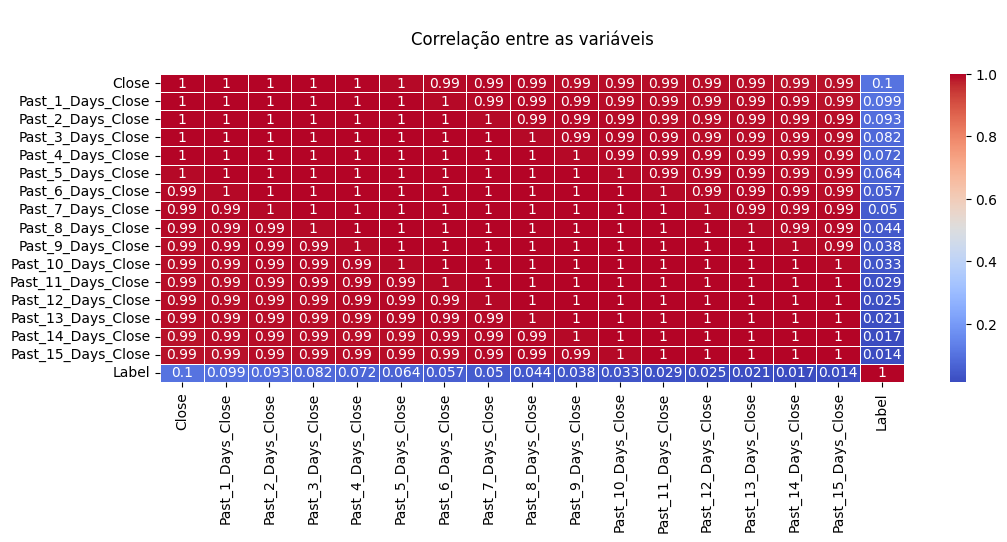

In [8]:
correlation = spec_bbas3.select_dtypes("number").corr()

plt.figure(figsize=(12, 4))

sns.heatmap(
    correlation, 
    annot=True, 
    annot_kws={"size" : 10},
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor="white"
)

plt.title("\nCorrelação entre as variáveis\n", fontdict={"size" : 12})

plt.show()

Nesse momento, há dois comportamentos importantes a serem notados:

- Variável dependente: a correlação entre a ação de venda/compra diminui ao passar dos dias, ou seja, considerando APENAS o que é apresentado acima, poderíamos pressupor que a ação é tomada com base nos dados mais recentes, ou seja, uma janela mais curta de dias.

- Variáveis independentes: diferente da variável dependente, todas as variáveis independentes apresentam uma alta correlação entre sí, o que nos leva a pensar que o valor de fechamento em D-15 influencia em D-14 e assim sucessivamente.

Posto isso, iremos desenvolver um modelo baseline para fazer uma classificação inicial das ações.

In [9]:
spec_bbas3["Label"] = spec_bbas3["Label"].apply(lambda x: 0 if x == -1 else 1)
spec_bbas3["Label"].unique()

array([0, 1])

Como apresentado anteriormente, a variável alvo pode assumir os valores do intervalo [-1, 1], o que pode ser um problema ao utilizarmos a função de ativação sigmoid (que assume valores no intervalo [0, 1]), sendo assim, substituímos os valores -1 por 0.

Feito isso, iremos realizar quatro testes para o baseline: sem normalizações, com standard scalling, com minmax scalling e com robust scalling. Para isso serão construídas as variáveis "x", "x_standard", "x_minmax" e "x_robust".

In [10]:
x = np.array(spec_bbas3.drop(columns=["Label"]))
x_standard = np.array(StandardScaler().fit_transform(spec_bbas3.drop(columns=["Label"])))
x_minmax = np.array(MinMaxScaler().fit_transform(spec_bbas3.drop(columns=["Label"])))
x_robust = np.array(RobustScaler().fit_transform(spec_bbas3.drop(columns=["Label"])))
x_list = [x, x_standard, x_minmax, x_robust]
y = np.array(spec_bbas3["Label"])

Com as variáveis independentes tratadas, podemos iniciar o desenho da arquitetura da rede neural. 

Optamos por seguir com o uso das LSTM (Long Short-Term Memory), visto a sua capacidade de "lembrar" de dados já processados em um determinado espaço de tempo, o que as tornam fortes candidatas para solucionar o problema que queremos resolver: comprar ou vender uma determinada ação.

Sendo assim, iremos realizar testes utilizando as camadas LSTM, Dropout e Densa para cada conjunto X (não normalizado, standard, minmax e robust).

- Teste 1

    - 1 Camada LSTM (sem retorno) com 16 unidades 
    - 1 Camada Dropout (0.1 * número da camada) 
    - 1 Camada Densa (sigmoid) com 1 unidade

- Teste 2 
    - 1 Camada LSTM (com retorno) com 16 unidades
    - 1 Camada Dropout (0.1 * número da camada)
    - 1 Camada LSTM (sem retorno) com 16 unidades 
    - 1 Camada Dropout (0.1 * número da camada) 
    - 1 Camada Densa (sigmoid) com 1 unidade

- Teste 3
    - 1 Camada LSTM (com retorno) com 16 unidades
    - 1 Camada Dropout (0.1 * número da camada)
    - 1 Camada LSTM (com retorno) com 16 unidades
    - 1 Camada Dropout (0.1 * número da camada)
    - 1 Camada LSTM (sem retorno) com 16 unidades 
    - 1 Camada Dropout (0.1 * número da camada) 
    - 1 Camada Densa (sigmoid) com 1 unidade

In [11]:
scores, accuracies, losses = list(), list(), list()

In [12]:
grid = [[1,16], [1,32], [1,64], [2,16], [2,32], [2,64], [3,16], [3,32], [3,64]]
grid_size = len(grid)

In [13]:
for i in range(grid_size):
    for x_i in x_list:
        lstm = CL()
        lstm.build_model(c_layers_number=grid[i][0], c_units_number=grid[i][1], c_dropout_rate=0.1, c_input_shape=(16, 1))
        lstm.compile_model("adam", "binary_crossentropy")
        lstm.fit_model(c_x=x_i, c_y=y, c_test_size=0.3, c_random_state=42, c_epochs_number=100, c_batches_number=64, c_verbose=0)
        lstm.evaluate_model()
        scores.append(lstm.c_model_scores)
        losses.append(lstm.c_model_statistics[0])
        accuracies.append(lstm.c_model_statistics[1])
        print(f"Arquitetura com {grid[i][0]} camadas e {grid[i][1]} neurônios\n")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4374
Arquitetura com 1 camadas e 16 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4056
Arquitetura com 1 camadas e 16 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4639
Arquitetura com 1 camadas e 16 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.4482
Arquitetura com 1 camadas e 16 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3174
Arquitetura com 1 camadas e 32 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8130 - loss: 0.3912
Arquitetura com 1 camadas e 32 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7618 - loss: 0.4669
Arquitetura com 1 camadas e 32 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4259
Arquitetura com 1 camadas e 32 neurônios

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.2949
Arquite

In [14]:
champion_index = 0
current_loss = float("+inf")
current_accuracy = float("-inf")

for i in range(36):
    if scores[i][0] < current_loss:
        current_loss = scores[i][0]
        champion_index = i
    if scores[i][1] > current_accuracy:
        current_accuracy = scores[i][1]
        champion_index = i

print(f"Modelo campeão: nº{champion_index} | Acurácia: {current_accuracy}% | Erro: {current_loss}%")

Modelo campeão: nº8 | Acurácia: 0.8817734122276306% | Erro: 0.2803767919540405%


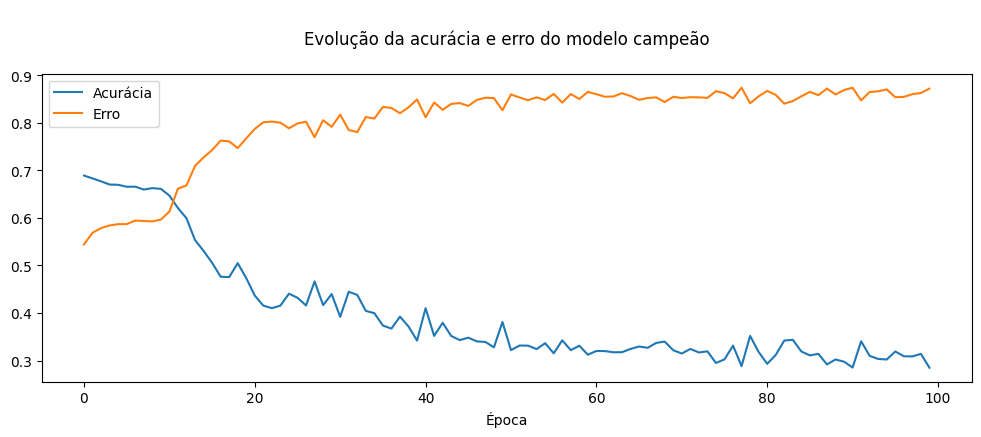

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(accuracies[champion_index])
plt.plot(losses[champion_index])
plt.title("\nEvolução da acurácia e erro do modelo campeão\n")
plt.xlabel("Época")
plt.legend(["Acurácia", "Erro"], loc="upper left")
plt.show()